# Notes

## selection of variable

### Principal Variables
iterative search of variables that covariates more with Y response vector. After the first PV is found, the matrix is reduced to find the next one.

KW: supervised methods


Nørgaard, L., Saudland, A., Wagner, J., Nielsen, J. P., Munck, L., & Engelsen, S. B. (2000). Interval Partial Least-Squares Regression ( i PLS): A Comparative Chemometric Study with an Example from Near-Infrared Spectroscopy. Applied Spectroscopy, 54(3), 413–419. http://doi.org/10.1366/0003702001949500

### Forward stepwise selection
Apply univariate statistic to all variables and validate prediction on test set for all of them. Variable with lower RMSEP (error on the test/validation set) is chosen. All two-variable models are then build and evaluated, until the inclusion of new variable doesn't affect RMSEP anymore. For the selection of variable care must be taken not to overfit and independant validation test is often required.

KW: supervised methods


Nørgaard, L., Saudland, A., Wagner, J., Nielsen, J. P., Munck, L., & Engelsen, S. B. (2000). Interval Partial Least-Squares Regression ( i PLS): A Comparative Chemometric Study with an Example from Near-Infrared Spectroscopy. Applied Spectroscopy, 54(3), 413–419. http://doi.org/10.1366/0003702001949500

### Recursive weighted Regression
the loadings are used to weight the X matrix recursively until convergence. Only the number of variable is chosen arbitrarily.

KW: supervised methods

Rinnan, Å., Andersson, M., Ridder, C., & Engelsen, S. B. (2014). Recursive weighted partial least squares (rPLS): An efficient variable selection method using PLS. Journal of Chemometrics, 28(5), 439–447. http://doi.org/10.1002/cem.2582

## Modeling

### interval PCA / PLS
the spectra is split into interval (fixed or variable) size and models are build for each of them. Interval with best results are attributed to intervals of the spectra of most interest for the global model.

Remark: how does it behave with very small interval (literature uses interval twice as big as regular interval for PLS). How dows it compare with univariate variable selection?

Nørgaard, L., Saudland, A., Wagner, J., Nielsen, J. P., Munck, L., & Engelsen, S. B. (2000). Interval Partial Least-Squares Regression ( i PLS): A Comparative Chemometric Study with an Example from Near-Infrared Spectroscopy. Applied Spectroscopy, 54(3), 413–419. http://doi.org/10.1366/0003702001949500

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
R = 5*1.8 #km
A = np.pi*np.power(R,2)
A


254.46900494077323

## PCA

### number of components

Determining the number of components in PCA analysis is crucial because it allows to distinguis the informative variance from the noise. It is expected that the former is larger than the latter and therefore the first eignevalues of the covariance matrix (the variances of the first components) are larger than the following ones.

The Tracy-Widom probability density function describes the distribution of the largest eigenvalues for completely random covariance matrices. Therefore it provides a test ot whether the data have structure (informative variables) or not.

Saccenti, E., & Timmerman, M. E. (2016). Approaches to sample size determination for multivariate data: Applications to PCA and PLS-DA of omics data. Journal of Proteome Research, 15(8), 2379–2393. http://doi.org/10.1021/acs.jproteome.5b01029

no funciono

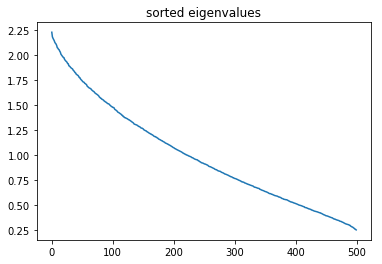

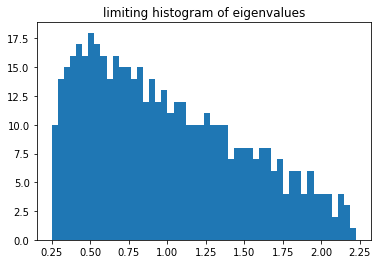

NameError: name 'pd' is not defined

In [2]:
n = 2000
p = 500

S = np.matrix( (np.random.normal(0,1,n*p).reshape(n,p)) )
C = np.cov(np.transpose(S)) 

S = np.subtract(S, np.mean( S, axis=0 ))
#np.round( np.mean( S, axis=0 ) )
C2 = np.divide( np.matmul(np.transpose(S),S), n )
#C = C - np.diag(C)
#C = np.identity(p)
#C[0,0] = 10
#C[1,1] = 8
A = np.linalg.eig(C2)

plt.title('sorted eigenvalues')
#plt.plot(np.arange(C.shape[0]), A[0])
plt.plot(np.arange(C.shape[0]), sorted(A[0],reverse=True))
plt.show()

plt.title('limiting histogram of eigenvalues')
plt.hist(sorted(np.real(A[0])),bins=50)
plt.show()

df = pd.DataFrame(A[0])
df.plot.density(title='limiting density of eigenvalues')

In [360]:
np.var(S[:,1])

0.98327283381558295

In [314]:
np.mean(S[:,1])

3.552713678800501e-17

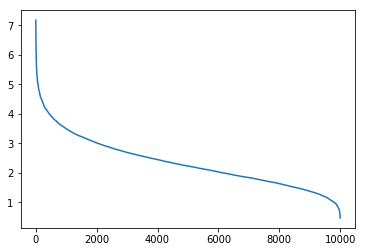

In [379]:
n = 5
p = 5
D = []
L = 10000

for i in range(0, L):
    #S = np.matrix( (sp.randn(n,p)) )
    S = np.matrix( (np.random.normal(0,1,n*p).reshape(n,p)) )
    S = np.subtract(S, np.mean( S, axis=0 ))
    C = np.divide( np.matmul(np.transpose(S),S), n )
    A = np.linalg.eig(C)
    D.append(np.max(A[0]))


plt.plot(np.arange(L), sorted(D,reverse=True))
plt.show()


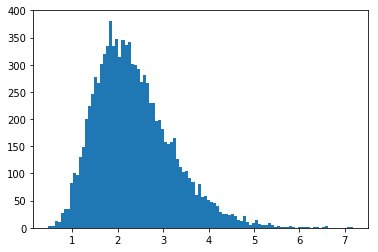

In [380]:
plt.hist(D,bins=100)
plt.show()

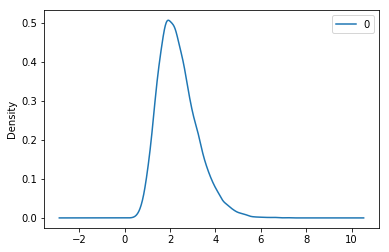

In [381]:
df = pd.DataFrame(D)
df.plot(kind='density')

In [391]:
C = np.identity(p)
C[0,0] = 10
C[1,1] = 8

In [397]:
C

array([[ 10.,   0.,   0.,   0.,   0.],
       [  0.,   8.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   1.]])

In [398]:
np.linalg.eig(C)

(array([ 10.,   8.,   1.,   1.,   1.]), array([[ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.]]))

In [401]:
C = np.arange(0,9).reshape(3,3)
C

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [403]:
A = np.linalg.eig(C)
A

(array([  1.33484692e+01,  -1.34846923e+00,  -1.15433316e-15]),
 array([[ 0.16476382,  0.79969966,  0.40824829],
        [ 0.50577448,  0.10420579, -0.81649658],
        [ 0.84678513, -0.59128809,  0.40824829]]))

In [407]:
np.matmul( A[1], np.transpose(A[0]) )

array([  1.12097436,   6.61079673,  12.1006191 ])

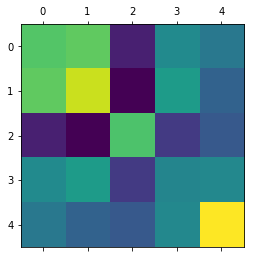

matrix([[  6.05680942,   6.35746886,  -3.65037618,   2.22960854,
           1.06565521],
        [  6.35746886,   8.81753445,  -4.94913105,   3.29954631,
          -0.21422307],
        [ -3.65037618,  -4.94913105,   5.84039731,  -2.4141185 ,
          -0.76359265],
        [  2.22960854,   3.29954631,  -2.4141185 ,   1.86817163,
           2.07191094],
        [  1.06565521,  -0.21422307,  -0.76359265,   2.07191094,
          10.04302941]])

In [390]:
plt.matshow(np.matmul(np.transpose(S),S))
plt.show()
np.matmul(np.transpose(S),S)

In [385]:
np.percentile(D,50)

2.230687041939861

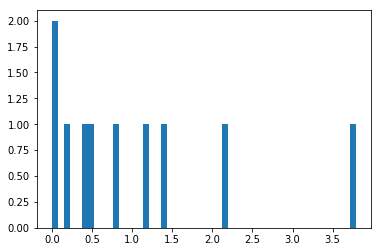

In [310]:
plt.hist(sorted(np.real(A[0])),bins=50)
plt.show()

In [249]:
np.power( np.sqrt(n)+np.sqrt(p), 2 )

40.000000000000007

In [328]:
mu_np = np.power( np.sqrt(n-1) + np.sqrt(p), 2)
sigma_np = np.multiply( np.sqrt(n-1) + np.sqrt(p), np.power(1/np.sqrt(n-1)+1/np.sqrt(p),1/3))

In [329]:
(A[0][0] - mu_np) / sigma_np

-251.81718334607544

In [330]:
A[0][0]

3.9689203201800956

In [240]:
np.std(S[:,0])

1.2432954748161231

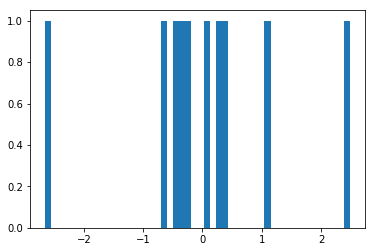

In [241]:
plt.hist(S[:,0],bins=50)
plt.show()

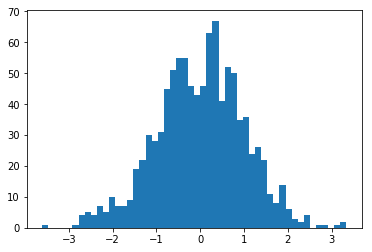

In [215]:
plt.hist(S[:,0],bins=50)
plt.show()

In [216]:
C[1,1:10]

array([ 1.05778373, -0.05881601,  0.00954084, -0.02052903, -0.0627378 ,
        0.01765268, -0.01276595, -0.03752322, -0.00955641])

In [190]:
C2[1,1:10]

matrix([[ 0.97093395,  0.00483192, -0.00124857, -0.00134383, -0.04884857,
         -0.01170613, -0.03493499, -0.01353647,  0.00439961]])

In [191]:
A[1]

array([[ -3.23330264e-02,  -5.42963534e-02,   2.91393589e-02, ...,
         -9.08881444e-05,   3.17666129e-03,   9.54992063e-03],
       [ -3.81267195e-03,  -1.09199626e-02,   2.85962102e-03, ...,
          2.61187388e-02,   6.81834340e-03,  -2.59857166e-02],
       [ -1.13351998e-02,   1.66869346e-02,  -8.59725941e-03, ...,
          4.17269658e-03,  -3.23213605e-02,  -6.76938947e-02],
       ..., 
       [ -3.22049552e-02,  -1.86264279e-03,  -1.72076189e-02, ...,
          3.40683941e-02,   1.97703868e-02,   8.70328792e-03],
       [  3.09943079e-04,   5.13518582e-02,  -1.01703687e-02, ...,
          4.05890881e-04,   5.91430163e-02,  -7.23158034e-02],
       [ -8.44677541e-03,  -2.39635493e-02,   1.15079190e-02, ...,
          2.13802364e-02,  -3.31688662e-02,   2.29927130e-02]])

In [192]:
np.var(C[0,:])

0.0021214258020596241

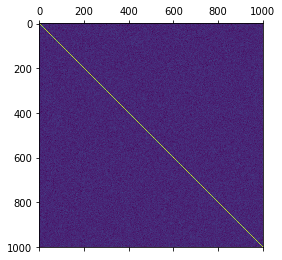

In [193]:
plt.matshow(C2)
plt.show()

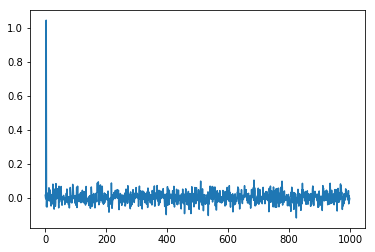

In [194]:
plt.plot(np.arange(C.shape[0]), C[:,3])
plt.show()

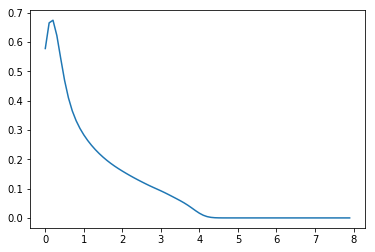

In [325]:
from scipy.stats import gaussian_kde
density = gaussian_kde(np.real(A[0]))
x = np.arange(0., 8, .1)
plt.plot(x, density(x))
plt.show()

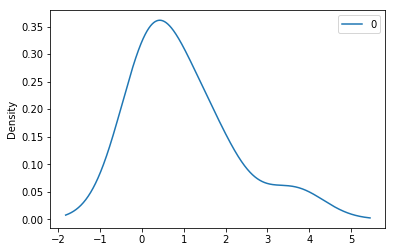

In [280]:
import pandas as pd
df = pd.DataFrame(np.real(A[0]))
df.plot(kind='density')


In [172]:
mean(np.real(A))

NameError: name 'mean' is not defined

In [60]:
import csv

In [61]:
with open('/Users/jul/git/pipe-generate-dataset/dataset.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    dataset = np.array(list(reader)).astype("float")

In [62]:
dataset.shape

(1000, 768)

In [63]:
with open('/Users/jul/git/pipe-generate-dataset/classMatrix.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    dataClass = np.array(list(reader)).astype("float")

In [64]:
dataClass

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [86]:
from matplotlib.mlab import PCA
model = PCA(dataset, standardize=False)

In [87]:
model.Y[:,0]

array([  1.13209968e+09,   1.39246954e+09,   1.33643648e+09,
         1.45046945e+09,   1.61032191e+09,   1.27310507e+09,
         1.81382487e+09,   1.21403919e+09,   1.63738196e+09,
         1.67249709e+09,   1.84033102e+09,   1.53927386e+09,
         2.05963286e+09,   1.29978829e+09,   1.16866316e+09,
         1.61257163e+09,   1.02352342e+09,   1.02295858e+09,
         1.45688241e+09,   1.63637982e+09,   1.26973874e+09,
         1.15310514e+09,   1.63498985e+09,   1.34311338e+09,
         1.39670652e+09,   9.82014429e+08,   6.32647906e+08,
         1.37874014e+09,   1.20267404e+09,   1.46346257e+09,
         9.75242272e+08,   9.84675272e+08,   2.09757293e+09,
         1.30760963e+09,   9.73991287e+08,   1.43533068e+09,
         1.19612206e+09,   1.71973123e+09,   1.01400450e+09,
         1.37629225e+09,   1.70546931e+09,   8.23144220e+08,
         1.89368197e+09,   1.82890075e+09,   9.99906753e+08,
         1.22853656e+09,   1.17308223e+09,   1.25100311e+09,
         1.33984538e+09,

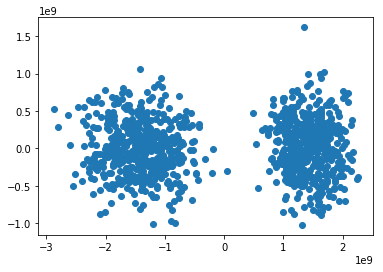

In [88]:
plt.scatter(model.Y[:,0], model.Y[:,1])


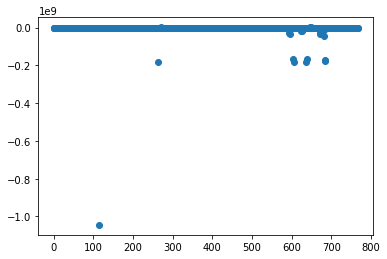

In [90]:
plt.scatter(np.arange(dataset.shape[1]), model.a[0,:])

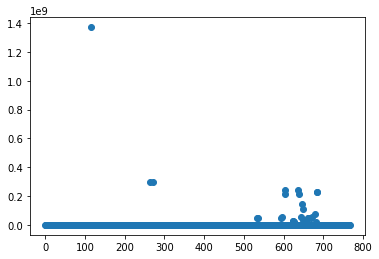

In [71]:
plt.scatter(np.arange(dataset.shape[1]), np.std(model.a[:,:], 0))

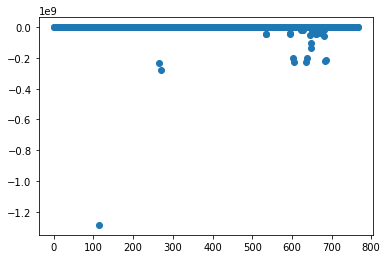

In [75]:
plt.scatter(np.arange(dataset.shape[1]), model.a[1,:])

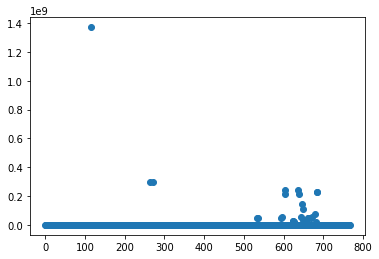

In [79]:
plt.scatter(np.arange(dataset.shape[1]), np.std(model.a[:,:], 0))